**Importing datasets and libraries needed**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
np.random.seed(42)
digits = load_digits()

#**Random forest with fixed number of attributes**

In [2]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

**Let XX be a value that comes from the square root of the number of features**

**In this section the number of attributes is fixed and the number of trees is different in each classification system, the first system has just 10 estimators(trees) and the second one has 200 estimators. The number of attributes is fixed to 'auto' which means that when looking for the best split the method is only going to consider XX features.**

##**Classification system 1**

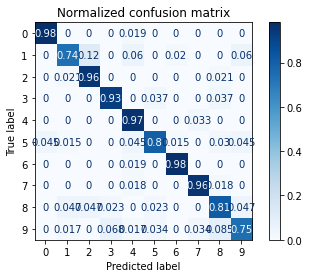

The mean accuracy on the given test data was:  0.8870370370370371


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=.3, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, n_jobs=-1, max_features="auto")
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred_rf)
disp = plot_confusion_matrix(rnd_clf, X_test, y_test,
                                 display_labels=digits.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()
print("The mean accuracy on the given test data was: ", rnd_clf.score(X_test, y_test))

**Analysis:** It can be appreciated that with just 10 estimators in the random forest we can achieve relatively high mean accuracy, around 90%. So it shows the power of random forest for classification task, however not for all dataset we can achieve this accuracy, but in general we can have good results with RFC using few computational resources
.

##**Classification system 2**

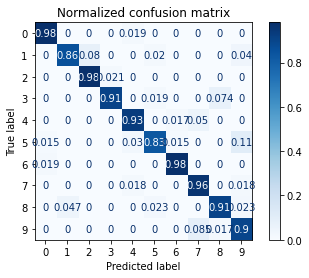

The mean accuracy on the given test data was:  0.9222222222222223


In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, digits.target, test_size=.3, random_state=42)
rnd_clf2 = RandomForestClassifier(n_estimators=600, max_leaf_nodes=16, n_jobs=-1, max_features="auto")
rnd_clf2.fit(X_train2, y_train2)
y_pred_rf2 = rnd_clf2.predict(X_test)
CM2 = confusion_matrix(y_test2, y_pred_rf2)
disp2 = plot_confusion_matrix(rnd_clf2, X_test2, y_test2,
                                 display_labels=digits.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp2.ax_.set_title("Normalized confusion matrix")
plt.show()
print("The mean accuracy on the given test data was: ", rnd_clf2.score(X_test2, y_test2))

**Analysis:** For this classification system we are using 600 estimators, a lot more than in the classification system before and it can be found that the mean accuracy is higher, so we have checked that generally adding more estimators results in better predictions. But, the difference is really big.

#**Random forest with fixed number of trees**




1.   **Let XX be a value that comes from the square root of the total number of features**
2.   **Let YY be 64 which the number of all features**

**For the following classifications, we are going to use the same numbers of estimators and we are varying the 'best split' method. In the first classification system we are taking into account YY features and in the second one we are using xx features. In both classifications systems we are using 100 estimators, that is also the default value for the RandomForestClassifier in scikit learn.**

In [7]:
n_trees = 100

##**Classification system 1**

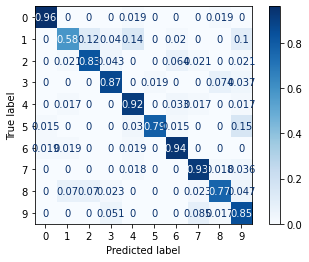

The mean accuracy on the given test data was:  0.8462962962962963


In [18]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data, digits.target, test_size=.3, random_state=42)
rnd_clf3 = RandomForestClassifier(n_estimators=n_trees, max_leaf_nodes=16, n_jobs=-1, max_features=64)
rnd_clf3.fit(X_train3, y_train3)
y_pred_rf3 = rnd_clf3.predict(X_test3)
CM3 = confusion_matrix(y_test3, y_pred_rf3)
disp3 = plot_confusion_matrix(rnd_clf3, X_test3, y_test3,
                                 display_labels=digits.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()
print("The mean accuracy on the given test data was: ", rnd_clf3.score(X_test3, y_test3))

**Analysis:** In this classification system we are taking into account all the features in the data, this decrease the accuracy on the given test data because we are in a certain way overfitting the model on the training stage.

##**Classification system 2**

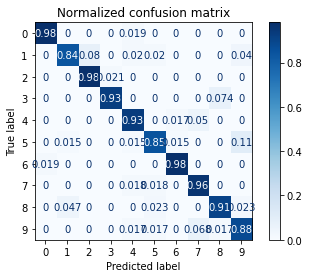

The mean accuracy on the given test data was:  0.9222222222222223


In [9]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(data, digits.target, test_size=.3, random_state=42)
rnd_clf4 = RandomForestClassifier(n_estimators=n_trees, max_leaf_nodes=16, n_jobs=-1, max_features="sqrt")
rnd_clf4.fit(X_train4, y_train4)
y_pred_rf4 = rnd_clf4.predict(X_test4)
CM4 = confusion_matrix(y_test4, y_pred_rf4)
disp4 = plot_confusion_matrix(rnd_clf4, X_test4, y_test4,
                                 display_labels=digits.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp4.ax_.set_title("Normalized confusion matrix")
plt.show()
print("The mean accuracy on the given test data was: ", rnd_clf4.score(X_test4, y_test4))

**Analysis:** In this classifier we are using the default split method which only takes up to the square root of all the features and the mean accuracy is higher compared to the previous classifier because it is splitting be a reasonable amount of features.